# Frontside

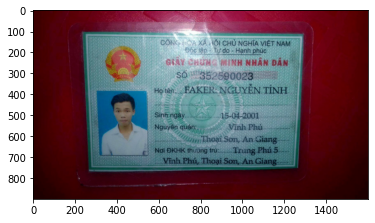

In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('data/cmnd1.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

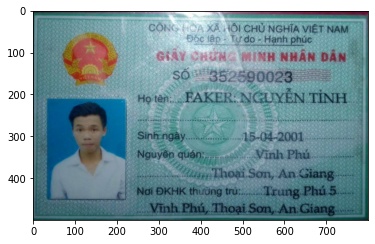

In [2]:
from alignment_frontside import align_card
img_aligned = align_card(img)
plt.imshow(img_aligned)

In [3]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = './transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cpu'
config['predictor']['beamsearch']=False
ocrmodel = Predictor(config)

In [4]:
from reader import FrontsideReader

reader = FrontsideReader(ocrmodel)
info = reader.extract(img_aligned)
info

{'Số CMND': '352590023',
 'Họ tên': 'FAKER NGUYỄN TÍNH',
 'Sinh ngày': '15-04-2001',
 'Nguyên quán': 'Vĩnh Phú, Thoai Sơn, An Giang',
 'Nơi ĐKHK thường trú': 'Trung Phú 5, Vĩnh Phú, Thoại Sơn, An Giang'}

# Backside

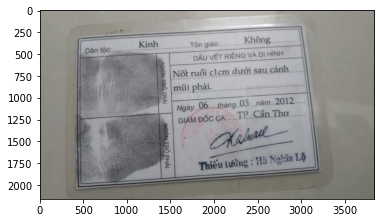

In [5]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('data/test_backside4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

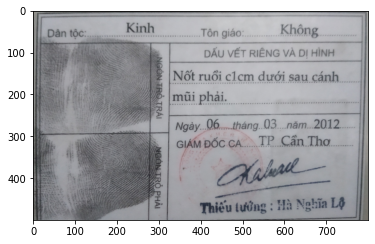

In [6]:
from alignment_backside import BacksideAligner
aligner = BacksideAligner(model_device='cpu')
aligner.load_weight('alignment_backside_weight.pth')
img_aligned = aligner.warp(img)
plt.imshow(img_aligned)

In [7]:
from reader import BacksideReader
reader = BacksideReader(ocrmodel)
info = reader.extract(img_aligned)
info

{'Dân tộc': 'Kinh',
 'Tôn giáo': 'Không',
 'Dấu vết riêng và dị hình': 'Nốt ruổi clcm dưới sau cánh mũi phải.',
 'Ngày cấp': {'Ngày': 6, 'Tháng': 3, 'Năm': 2012},
 'Nơi cấp': 'TP. Cần Thơ'}